In [2]:
# %pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpwp4ywrbb/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=5/part-00087-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2657-1.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpwp4ywrbb/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=6/part-00171-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2741-1.c000.snappy.parquet
Index(['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'pickupLongitude', 'pickupLatitude', 'dropoffLongitude',
       'dropoffLatitude', 'rateCodeID', 'storeAndFwdFlag', 'paymentType',
       'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipA

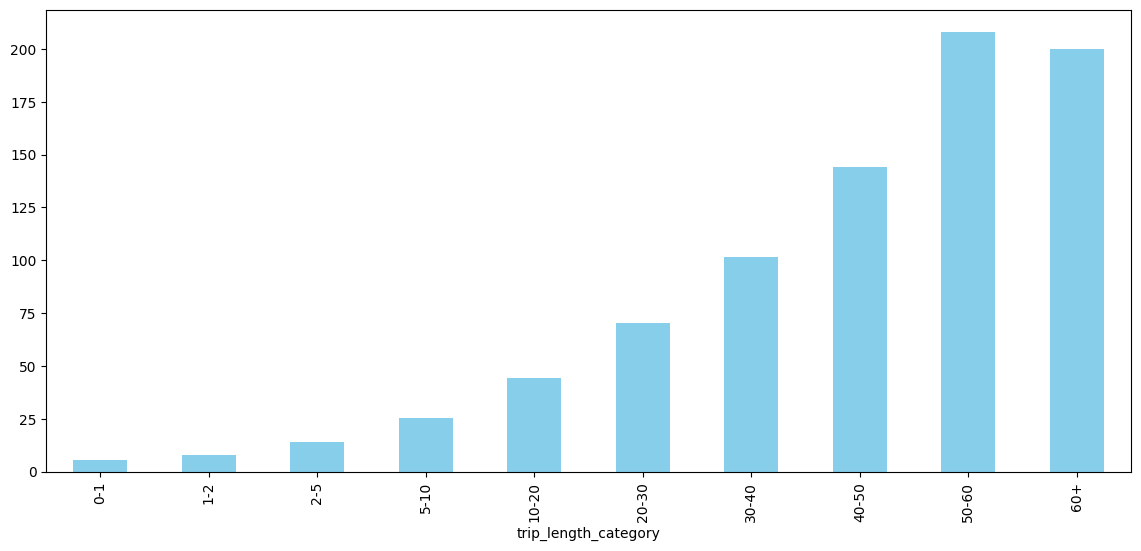

In [10]:
# Import necessary libraries
from azureml.opendatasets import NycTlcGreen
from datetime import datetime
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date range
end_date = parser.parse('2018-06-06')
start_date = parser.parse('2018-05-01')

# Fetch the dataset
nyc_tlc = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

# Display the columns to verify the names
print(nyc_tlc_df.columns)

# Check if 'tripDistance' and 'fareAmount' exist
if 'tripDistance' not in nyc_tlc_df.columns or 'fareAmount' not in nyc_tlc_df.columns:
    print("Columns 'tripDistance' or 'fareAmount' not found. Available columns are:")
    print(nyc_tlc_df.columns)
else:
    # Convert pickup and dropoff datetime to pandas datetime format
    nyc_tlc_df['lpepPickupDatetime'] = pd.to_datetime(nyc_tlc_df['lpepPickupDatetime'])
    nyc_tlc_df['lpepDropoffDatetime'] = pd.to_datetime(nyc_tlc_df['lpepDropoffDatetime'])

    # Compute trip duration in minutes
    nyc_tlc_df['trip_duration'] = (nyc_tlc_df['lpepDropoffDatetime'] - nyc_tlc_df['lpepPickupDatetime']).dt.total_seconds() / 60.0

    # Remove rows with zero or negative trip distances and fares for analysis
    nyc_tlc_df = nyc_tlc_df[(nyc_tlc_df['tripDistance'] > 0) & (nyc_tlc_df['fareAmount'] > 0)]

    # Define trip length categories
    bins = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, float('inf')]
    labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
    nyc_tlc_df['trip_length_category'] = pd.cut(nyc_tlc_df['tripDistance'], bins=bins, labels=labels, right=False)

    # Compute average fares for each trip length category
    average_fares = nyc_tlc_df.groupby('trip_length_category')['fareAmount'].mean()

    # Plot average fares by trip length category
    plt.figure(figsize=(14, 6))
    average_fares.plot(kind='bar', color='skyblue')


In [9]:
# Import necessary libraries
from azureml.opendatasets import NycTlcGreen
from datetime import datetime
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date range
end_date = parser.parse('2018-06-06')
start_date = parser.parse('2018-05-01')

# Fetch the dataset
nyc_tlc = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

# Display the columns to verify the names
print(nyc_tlc_df.columns)

# Check if 'trip_distance' exists, if not, print the columns to inspect
if 'trip_distance' not in nyc_tlc_df.columns:
    print("Column 'trip_distance' not found. Available columns are:")
    print(nyc_tlc_df.columns)
else:
    # Convert pickup and dropoff datetime to pandas datetime format
    nyc_tlc_df['lpepPickupDatetime'] = pd.to_datetime(nyc_tlc_df['lpepPickupDatetime'])
    nyc_tlc_df['lpepDropoffDatetime'] = pd.to_datetime(nyc_tlc_df['lpepDropoffDatetime'])

    # Compute trip duration in minutes
    nyc_tlc_df['trip_duration'] = (nyc_tlc_df['lpepDropoffDatetime'] - nyc_tlc_df['lpepPickupDatetime']).dt.total_seconds() / 60.0

    # Remove rows with zero or negative trip distances and fares for analysis
    nyc_tlc_df = nyc_tlc_df[(nyc_tlc_df['trip_distance'] > 0) & (nyc_tlc_df['fare_amount'] > 0)]

    # Define trip length categories
    bins = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, float('inf')]
    labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
    nyc_tlc_df['trip_length_category'] = pd.cut(nyc_tlc_df['trip_distance'], bins=bins, labels=labels, right=False)

    # Compute average fares for each trip length category
    average_fares = nyc_tlc_df.groupby('trip_length_category')['fare_amount'].mean()

    # Plot average fares by trip length category
    plt.figure(figsize=(14, 6))
    average_fares.plot(kind='bar', color='skyblue')
    plt.title('Average Fare by Trip Length')
    plt.xlabel('Trip Length (miles)')
    plt.ylabel('Average Fare ($)')
    plt.xticks(rotation=45)
    plt.show()

    # Plot fare distribution for various trip lengths
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='trip_length_category', y='fare_amount', data=nyc_tlc_df, palette='Set3')
    plt.title('Fare Distribution by Trip Length')
    plt.xlabel('Trip Length (miles)')
    plt.ylabel('Fare Amount ($)')
    plt.xticks(rotation=45)
    plt.show()


{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmp0e4q44c7/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=5/part-00087-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2657-1.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmp0e4q44c7/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=6/part-00171-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2741-1.c000.snappy.parquet
Index(['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'pickupLongitude', 'pickupLatitude', 'dropoffLongitude',
       'dropoffLatitude', 'rateCodeID', 'storeAndFwdFlag', 'paymentType',
       'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipA